In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # on mac

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from utils.mag_scripts import * 
from utils.barplots import * 


import altair as alt


# supress warnings
import warnings
warnings.filterwarnings('ignore')

Metagenome-atlas output summary
===============================

Her is the code to create the output summary

In [2]:
#go to output file 
%cd ../Example/

/Users/silas/Documents/GitHub/Tutorial/Example


## Metagenome assembled genomes

### Taxonomy

In [3]:
Tax= pd.read_table('Results/taxonomy.tsv',index_col=0)
Tax

,kindom,phylum,class,order,family,genus,species
user_genome,,,,,,,
MAG11,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Limosilactobacillus,Limosilactobacillus reuteri
MAG30,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Ligilactobacillus,Ligilactobacillus murinus
MAG08,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Lactobacillus johnsonii
MAG40,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelotrichaceae,Faecalibaculum,Faecalibaculum rodentium
MAG42,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelatoclostridiaceae,Erysipelatoclostridium,Erysipelatoclostridium cocleatum
...,...,...,...,...,...,...,...
MAG60,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Muribaculaceae,Paramuribaculum,NaN
MAG09,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Muribaculaceae,CAG-485,NaN
MAG14,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Muribaculaceae,CAG-485,NaN


In [4]:
# create a short label for each species
Labels=Tax.ffill(axis=1).species.copy()
Labels.loc[Tax.species.isnull()]+= ' '+ Labels.index[Tax.species.isnull()]

### Genome quality 

In [5]:
genome_quality= pd.read_table('Results/genome_completeness.tsv',index_col=0)

genome_quality['Quality_Score']= genome_quality.eval('Completeness -5*Contamination')
genome_quality['Lineage']= genome_quality['Marker lineage'].map(lambda s: s.split()[0])

genome_quality['Id']= genome_quality.index

genome_quality= genome_quality.join(Tax)
genome_quality['Name']= Labels

In [6]:

xscale = alt.Scale(domain=(0, 15))
yscale = alt.Scale(domain=(50, 101))

alt.Chart(genome_quality).mark_circle(opacity= .6).encode(
    alt.X('Contamination', scale=xscale),
    alt.Y('Completeness', scale=yscale),
    color='phylum',
    tooltip=['Name', 'Id', 'Contamination','Completeness' ]
).interactive()

alt.Chart(...)

## Abundance

In [7]:
Counts= pd.read_csv('Results/counts/raw_counts_genomes.tsv',index_col=0,sep='\t').T
Counts.head()

Sample,MAG01,MAG02,MAG03,MAG04,MAG05,MAG06,MAG07,MAG08,MAG09,MAG10,...,MAG54,MAG55,MAG56,MAG57,MAG58,MAG59,MAG60,MAG61,MAG62,MAG63
ERR675518,17393,117204,240075,24199,97526,7149,6495,14480,4277446,1527105,...,837654,754481,222679,637364,2251197,13554,31078,598647,266917,50307
ERR675519,281563,34570,29109,726600,201572,842380,82081,899429,3267,158149,...,1032238,42293,63801,10632,2311946,219586,5,8844,380229,119444
ERR675520,26242,86293,109919,18037,104119,9283,14199,25,2791862,1290291,...,426057,758568,231036,281075,55038,13006,62974,8184,292100,105351
ERR675521,331737,36247,40084,747249,254551,936095,166398,572995,45186,186964,...,538591,83709,163914,13811,25583,194744,22,72826,283419,173115
ERR675522,23531,91372,35514,73140,36218,10569,5704,16,5908203,1051319,...,417819,530912,316013,15330,95070,28450,199,609486,158053,213068


### Mapping rate

Text(0.5, 1.0, 'Mapping rate')

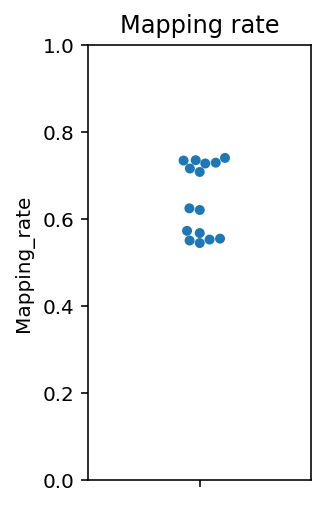

In [8]:
mapping_rate = pd.read_table('Results/mapping_rate.tsv',index_col=0,squeeze=True)
f,ax= plt.subplots(figsize=(2,4))
ax.set_ylim([0,1])
sns.swarmplot(y= mapping_rate,ax=ax)

ax.set_title('Mapping rate')


### Stats based on raw Counts

There are good reasons to use rawcounts and use centric log ratios, see more in 

Gloor, Gregory B., Jean M. Macklaim, Vera Pawlowsky-Glahn, and Juan J. Egozcue. 2017. “Microbiome Datasets Are Compositional: And This Is Not Optional.” Frontiers in Microbiology 8 (November). Frontiers: 2224. doi:10.3389/fmicb.2017.02224.


For differencial abundance analysis see also the same paper.

In [9]:
# transforme counts with centrig log ratio

data= clr(Counts)


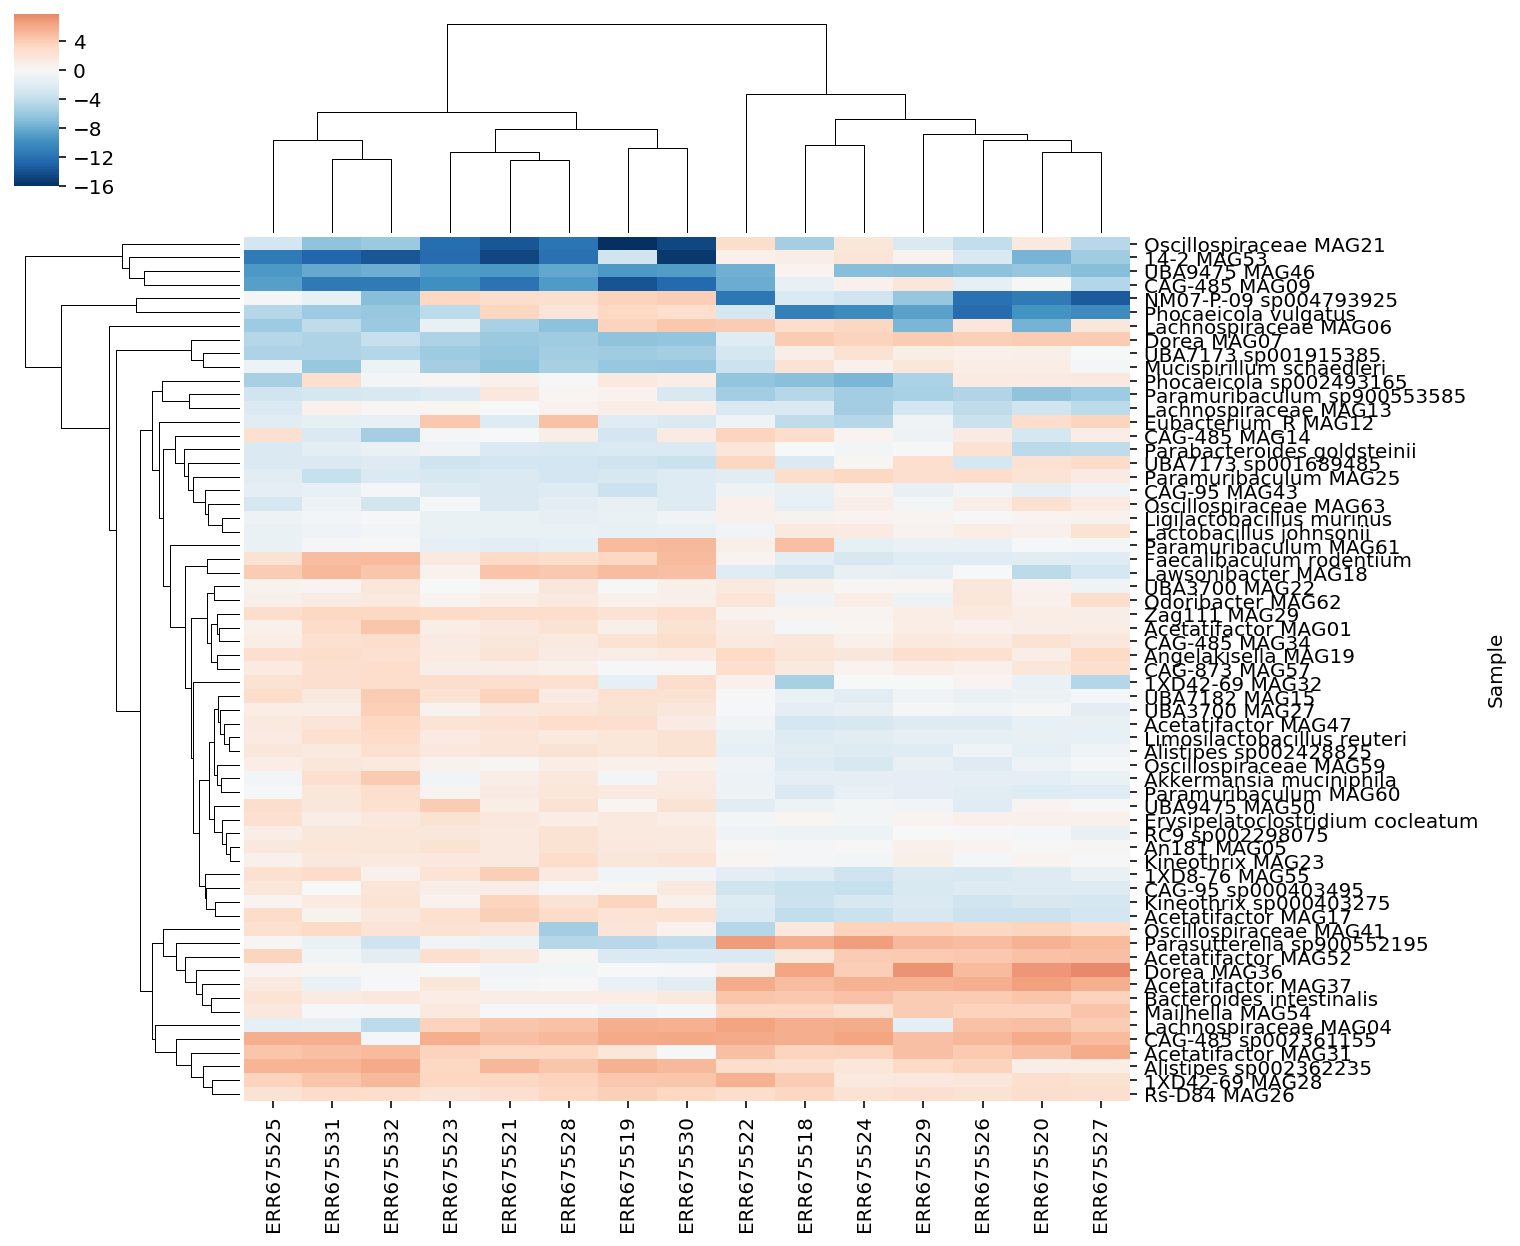

In [10]:
sns.clustermap(data.T,
            row_cluster=True,cmap='RdBu_r', center=0,
             yticklabels= Labels,
              )


### PCA (PCoA) of the robust aitchison distance

In [11]:
from sklearn.decomposition import PCA

pca= PCA()
transformed_data= pca.fit_transform(data)


In [12]:
pca_data= pd.DataFrame()
pca_data['PC 1']= transformed_data[:,0]
pca_data['PC 2']= transformed_data[:,1]
pca_data['Sample']= data.index



alt.Chart(pca_data).mark_circle(size=60).encode(
    x='PC 1',
    y='PC 2',
    tooltip=['Sample' ]
).interactive()


alt.Chart(...)

## Relative abundance


For the relative abundance we take the coverage over the genome not the raw counts. This inmplicit normalizes for genome size. The coverage is calculated as the median of the coverage values calculated in 1kb blocks.

In [13]:
D = pd.read_table("Results/counts/median_coverage_genomes.tsv",index_col=0)
D.head()

,MAG01,MAG02,MAG03,MAG04,MAG05,MAG06,MAG07,MAG08,MAG09,MAG10,...,MAG54,MAG55,MAG56,MAG57,MAG58,MAG59,MAG60,MAG61,MAG62,MAG63
ERR675518,0.00,6.020,6.47,0.24,1.82,0.02,0.16,0.50,104.515,41.08,...,33.375,15.760,2.67,17.44,42.300,0.31,1.41,21.75,7.375,0.57
ERR675519,5.59,1.320,0.00,10.47,3.36,19.18,2.53,41.03,0.000,3.83,...,42.480,0.620,0.96,0.21,44.725,10.14,0.00,0.31,10.930,0.24
ERR675520,0.22,4.950,2.58,0.12,1.34,0.09,0.41,0.00,72.945,34.41,...,17.345,16.875,3.22,7.94,0.170,0.34,3.02,0.24,8.275,2.65
ERR675521,5.82,1.720,0.00,12.07,3.21,21.45,5.16,25.56,1.090,4.34,...,21.865,1.510,2.63,0.27,0.000,8.49,0.00,2.72,8.115,0.42
ERR675522,0.00,4.085,0.36,1.03,0.76,0.17,0.15,0.00,153.425,32.31,...,16.600,11.800,4.89,0.00,0.000,0.92,0.00,22.82,4.380,5.41


In [14]:
#calculate relative abundance

relab = (D.T/D.sum(1)).T

Text(0, 0.5, 'Abundance [relab]')

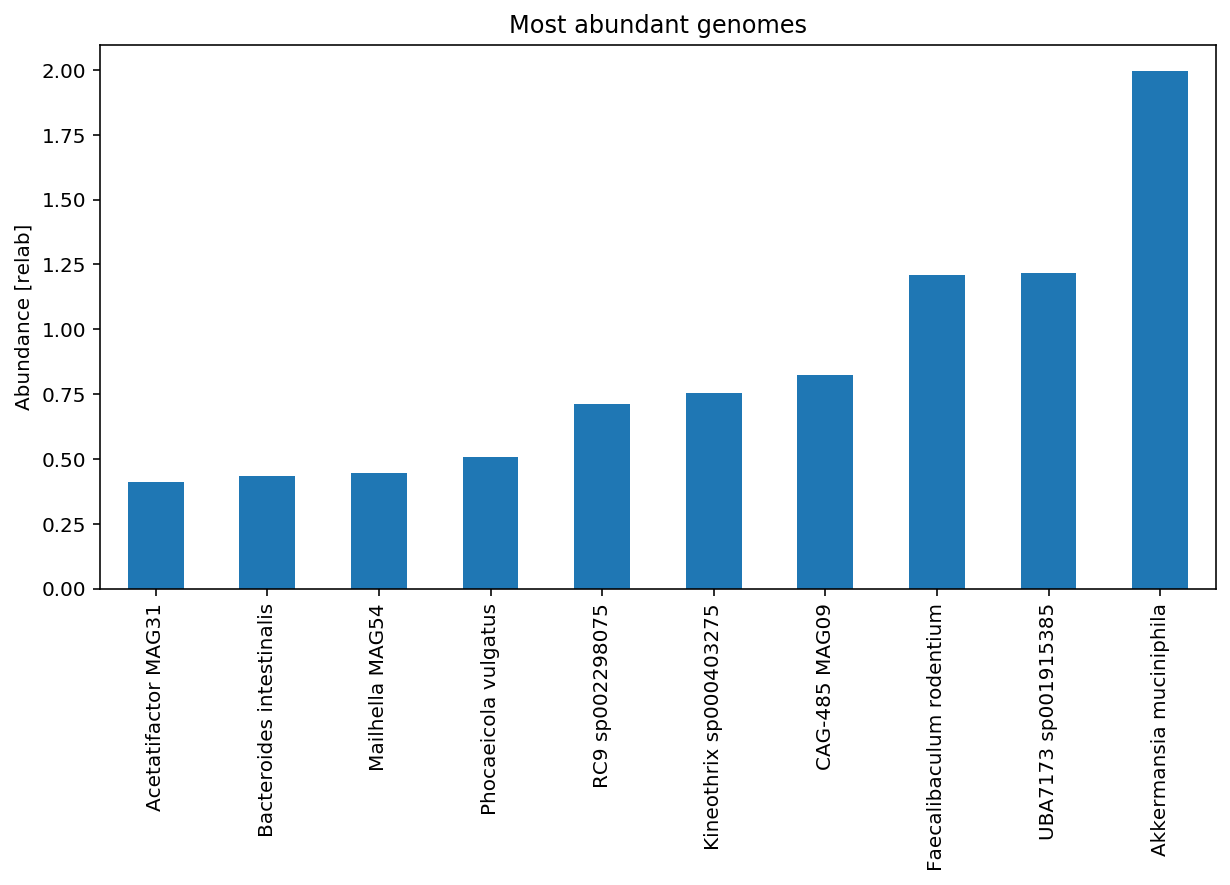

In [15]:
# get most abundant genomes

counts_per_genome= relab.sum().sort_values()
ax= counts_per_genome[-10:].plot.bar(figsize=(10,5))

_= ax.set_xticklabels(Labels.loc[counts_per_genome.index[-10:]])
ax.set_title('Most abundant genomes')
ax.set_ylabel('Abundance [relab]')

### Typical bar chart

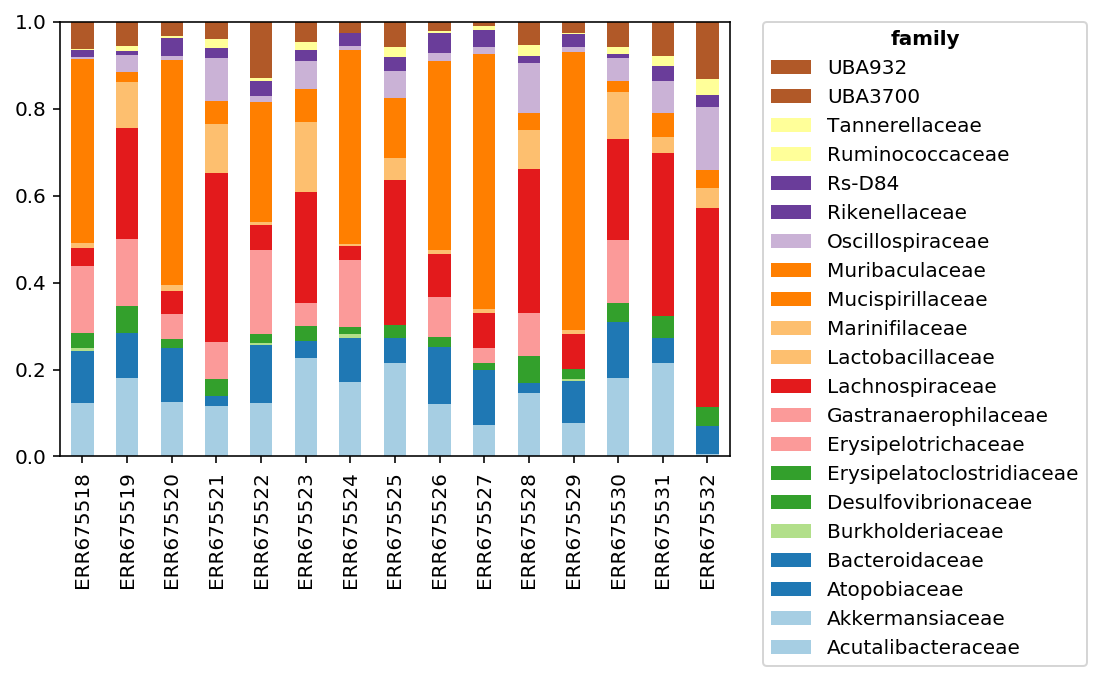

In [16]:

level='family'

grouped_data =relab.groupby(Tax[level],axis=1).sum()

ax= BarPlot(grouped_data)

ax.legend_.set_title(level,{'weight':'bold'})


## Functional annotation


Relative abundance of functional annotations per sample

The abundance is calculated as the sum of the relative abundance of all bacteria containing a function.

### CAZy

,AA10,CBM15,CBM20,CBM42,CBM48,CBM50,CBM6,CBM73,CE1,CE10,...,GT66,GT8,GT81,GT84,GT9,PL11,PL12,PL13,PL21,PL8
ERR675518,0.001264,0.001138,0.303127,0.154332,0.942357,0.136031,0.057485,0.001264,0.219176,0.078272,...,0.006327,0.094956,0.006817,0.020356,0.643034,0.090768,0.055620,0.033315,0.036128,0.234253
ERR675519,0.009996,0.007190,0.007372,0.000000,0.854865,0.218049,0.084719,0.009996,0.241016,0.187480,...,0.003498,0.121221,0.000000,0.000000,0.340819,0.032792,0.000753,0.000498,0.001664,0.110108
ERR675520,0.001276,0.012479,0.362556,0.244196,0.940441,0.125164,0.131176,0.001276,0.196501,0.055319,...,0.004490,0.103710,0.002940,0.018793,0.676785,0.146612,0.101647,0.089179,0.092849,0.209060
ERR675521,0.010213,0.006210,0.007736,0.000000,0.867113,0.179277,0.125514,0.010213,0.301467,0.281992,...,0.006194,0.129034,0.000000,0.000000,0.271159,0.105578,0.001632,0.001224,0.005197,0.074243
ERR675522,0.001489,0.023959,0.196098,0.000102,0.958049,0.129958,0.106068,0.001489,0.272423,0.163352,...,0.007062,0.078737,0.000458,0.022929,0.497926,0.116489,0.055846,0.055846,0.062068,0.288945


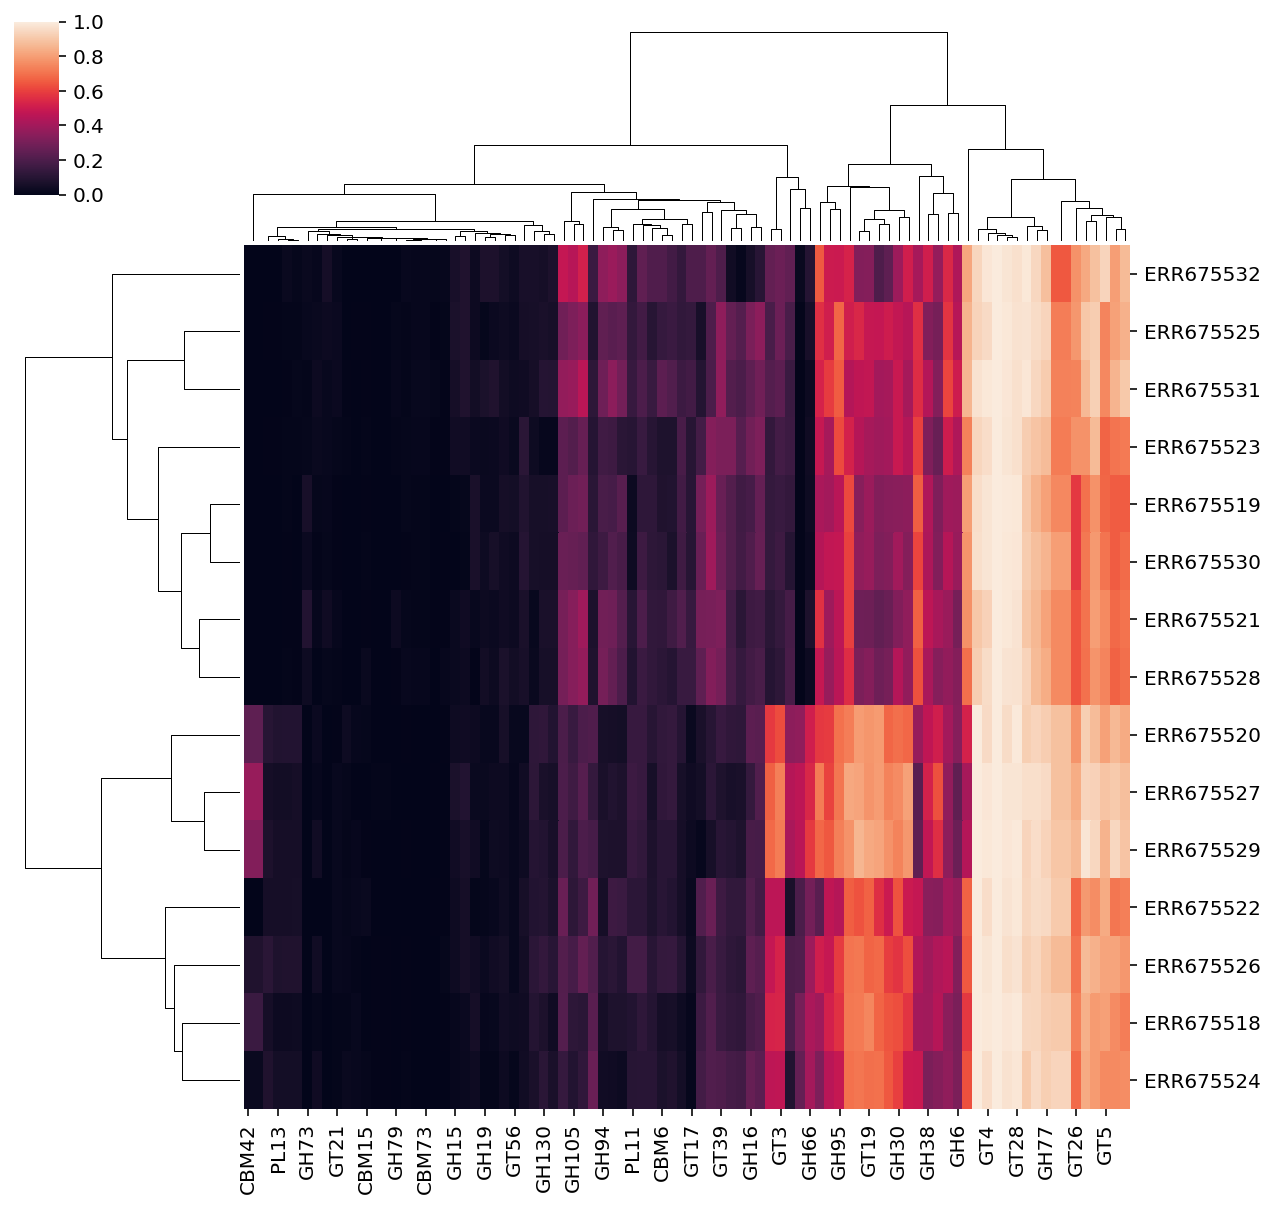

In [17]:
#CAZy
CAZy_annotations_genome= pd.read_table('Results/annotations/CAZy.tsv',index_col=0)
CAZy_presence= (CAZy_annotations_genome>0).astype(int)
CAZy_presence.head()


function_relab = relab @ CAZy_presence

sns.clustermap(function_relab)

function_relab.head()

### Kegg orthologs

,K00001,K00002,K00003,K00004,K00005,K00008,K00009,K00010,K00012,K00013,...,K22457,K22465,K22466,K22468,K22476,K22477,K22491,K22503,K22507,K22510
ERR675518,0.440011,0.010183,0.915543,0.013460,0.025587,0.701019,0.246648,0.003804,0.760464,0.639489,...,0.545924,0.035164,0.035164,0.005953,0.000695,0.033952,0.576873,0.004562,0.035164,0.087191
ERR675519,0.713561,0.130889,0.929096,0.087197,0.096506,0.716695,0.239012,0.034383,0.637860,0.778399,...,0.135207,0.051593,0.051593,0.000000,0.012084,0.261249,0.258905,0.098892,0.051593,0.349381
ERR675520,0.367651,0.015294,0.890621,0.012924,0.001744,0.707926,0.252043,0.012947,0.849752,0.639820,...,0.670135,0.019768,0.019768,0.000000,0.000866,0.049444,0.686244,0.014109,0.019768,0.082045
ERR675521,0.597525,0.178544,0.923294,0.193653,0.072083,0.741207,0.381346,0.050855,0.631179,0.705883,...,0.117725,0.033035,0.033035,0.000000,0.018810,0.376398,0.248179,0.162378,0.033035,0.525261
ERR675522,0.479559,0.010650,0.905161,0.014900,0.043784,0.640964,0.328581,0.014607,0.682489,0.553677,...,0.403691,0.021122,0.021122,0.003728,0.000611,0.056711,0.497869,0.027955,0.021122,0.091461


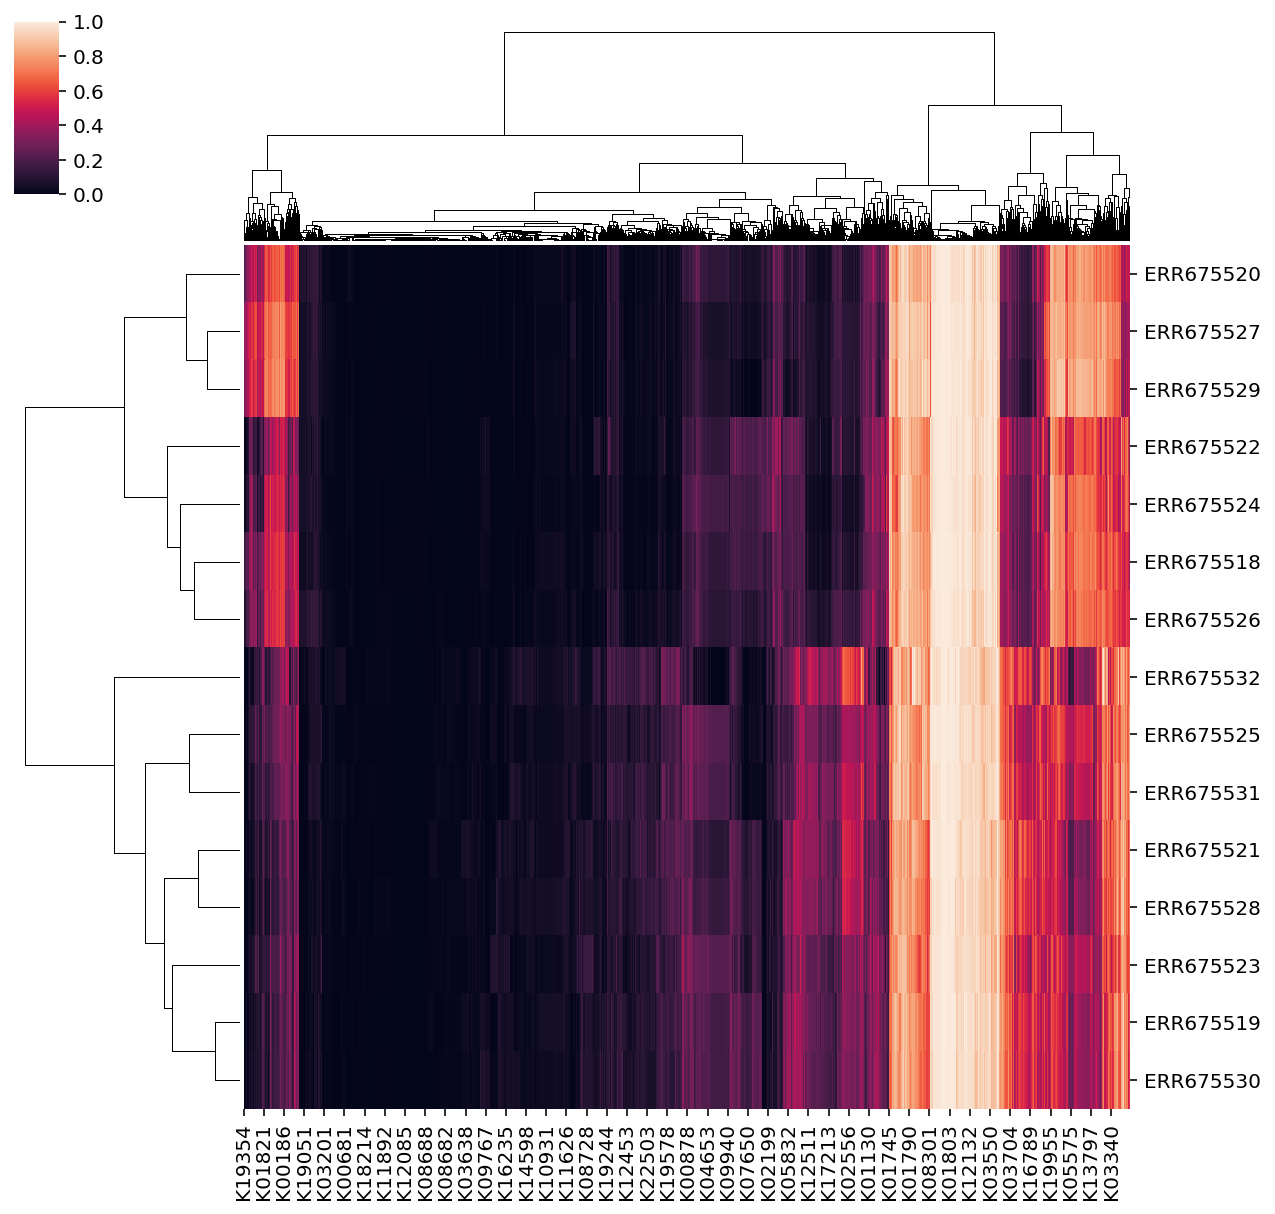

In [18]:
#Kegg orthologs

Kegg_annotations_genome= pd.read_table('Results/annotations/KO.tsv',index_col=0)
Kegg_presence= (Kegg_annotations_genome>0).astype(int)
Kegg_presence.head()


function_relab = relab @ Kegg_presence

sns.clustermap(function_relab)

function_relab.head()